In [163]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as st
import tensorflow as tf
from sklearn.model_selection import train_test_split

from src.utilities import data_generation as dg
from src.metrics import true_ece

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
dist1_1 = st.multivariate_normal(mean=[10, 10], cov=1, allow_singular=True)
dist1_2 = st.multivariate_normal(mean=[-3, 8.75], cov=1.7, allow_singular=True)
dist1_3 = st.multivariate_normal(mean=[-2, 2], cov=3.5, allow_singular=True)
dist1_4 = st.multivariate_normal(mean=[-6, 7], cov=2.1, allow_singular=True)

In [165]:
dist2_1 = st.multivariate_normal(mean=[-10, -10], cov=1.4, allow_singular=True)
dist2_2 = st.multivariate_normal(mean=[4, 12], cov=2.7, allow_singular=True)
dist2_3 = st.multivariate_normal(mean=[7, -20], cov=5.6, allow_singular=True)
dist2_4 = st.multivariate_normal(mean=[-10, 14.25], cov=0.68, allow_singular=True)

In [166]:
class_object1 = dg.ClassObject([dist1_1, dist1_2, dist1_3, dist1_4], None)
class_object2 = dg.ClassObject([dist2_1, dist2_2, dist2_3, dist2_4], None)

In [167]:
test = dg.DataGeneration([class_object1, class_object2], n_uninformative_features=0, title="dg-test")

In [168]:
n_samples_per_class_and_dist = 1000

X, y_true = test.generate_data(n_samples_per_class_and_dist)

In [169]:
print(np.shape(y_true))

(8000,)


<module 'matplotlib.pyplot' from 'D:\\ProgrammingProjects\\PyCharm\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

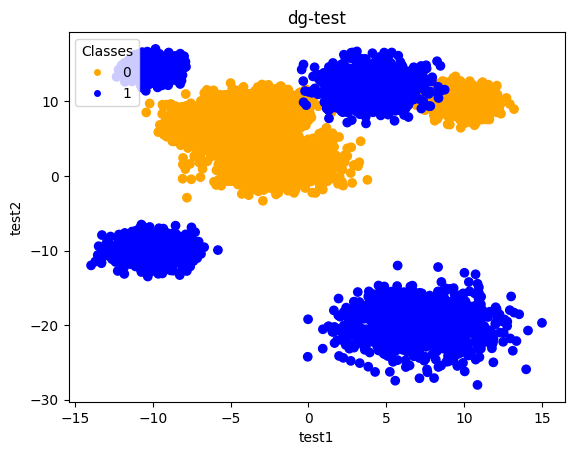

In [170]:
colormap = np.array(['orange', 'blue', 'red'])

test.scatter2d(0, 1, colormap=colormap, savePath="./plots/dg-test", axis1_label="test1", axis2_label="test2")

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

In [172]:
print(np.shape(y_true))

(8000,)


In [173]:
print(np.shape(y_test))

(2000,)


In [174]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [175]:
print(y_test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [176]:
model = tf.keras.Sequential()

In [177]:
model.add(tf.keras.layers.Dense(600, activation="tanh"))

In [178]:
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [179]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [180]:
model.fit(X_train.reshape(-1, 2), y_train, epochs=15, batch_size=1000)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6120 - loss: 0.7117  
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7260 - loss: 0.5953 
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.6072 
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.5704 
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7697 - loss: 0.5361 
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8134 - loss: 0.5390 
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.5001 
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7773 - loss: 0.4687 
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.4827 
Epoch 10/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8192 - loss: 0.4114 
Epoch 11/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.4013 
Epoch 12/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8767 - loss: 0.3793 


In [181]:
model.evaluate(X_test.reshape(-1, 2), y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.9704 - loss: 0.2702


[0.27363431453704834, 0.9674999713897705]

In [182]:
predictions = model.predict(X_test.reshape(-1,2))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step


In [183]:
print(np.shape(y_test))

(2000, 2)


In [184]:
y_test = np.argmax(y_test, axis=1)

In [185]:
print(y_test)

[0 0 0 ... 1 0 1]


In [186]:
print(predictions)

[[0.8012185  0.19878146]
 [0.86436224 0.13563778]
 [0.8490334  0.15096658]
 ...
 [0.43347657 0.56652343]
 [0.81394136 0.1860587 ]
 [0.04394737 0.95605266]]


In [187]:
p_test_true = np.array([[test.cond_prob(x, k=0), test.cond_prob(x, k=1)] for x in X_test])

In [188]:
true_ece.true_ece(predictions, p_test_true)

array([0.22354129, 0.22354129])

In [189]:
true_ece.calibration_error_summary(predictions, y_test, np.array([10, 20, 50]))

(array([0.1899, 0.1899, 0.1899]),
 array([0.19, 0.19, 0.19]),
 array([98.55, 94.8 , 88.6 ]),
 0.1899,
 0.0907)